In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [27]:
df = pd.read_csv('Dataset.csv',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [28]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feet = pd.DataFrame(scaled_feature,columns= df.columns[:-1])
df_feet.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [44]:
# l =[]
# l2 =[]
i=1
# for i in range(1,20):
x_train, x_test, y_train,y_test = train_test_split(scaled_feature,df['TARGET CLASS'],test_size=0.30)
knn = KNeighborsClassifier(n_neighbors=i)
print(knn.fit(x_train,y_train))
#l.append(x_train)
# l.append(knn.score(x_test,y_test))
# l2.append(i)
pred = knn.predict(x_test)
# pred

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


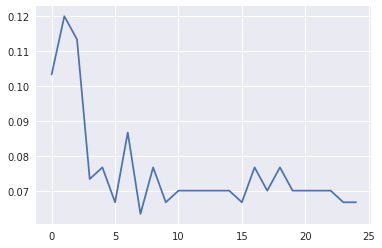

7


In [41]:
error=[]
k_val=[]
for k in range(25):
    k_val.append(k)
    knn = KNeighborsClassifier(n_neighbors=1+k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    error.append(1-accuracy)


plt.plot(k_val,error)
plt.show()
print(error.index(min(error)))

In [36]:
# knn = KNeighborsClassifier(n_neighbors=y.index(min(y)))
# knn.fit(x_train,y_train)
# pred = knn.predict(x_test)
# print(confusion_matrix(y_test,pred))
# print(classification_report(y_test,pred))

In [14]:
#naive_bayes
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
sns.set()
data = fetch_20newsgroups()
print(data.target_names)
categories = data.target_names
train = fetch_20newsgroups(subset= "train", categories= categories)
test = fetch_20newsgroups(subset="test", categories = categories)
print(train.data[0])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have o

In [16]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels = model.predict(test.data)

Text(91.67999999999999, 0.5, 'predict')

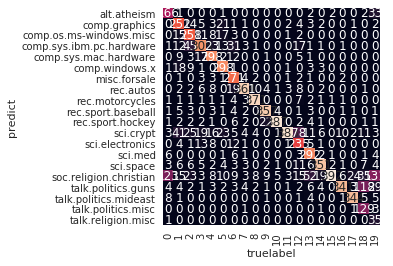

In [17]:
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square = True,annot = True,fmt = "d", cbar = False, yticklabels= train.target_names)
plt.xlabel("truelabel")
plt.ylabel("predict")

In [18]:
def predictcategories(s,train= train, model= model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


print(predictcategories("prime minister of nepal"))

talk.politics.mideast
